# Fraud Detection in Python

## Introduction and preparing your data

### Checking the fraud to non-fraud ratio

In [81]:
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("chapter_1/creditcard_sampledata.csv")

# Explore the features available in your dataframe
print(df.info())
print()

# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)
print()

# Print the ratio of fraud cases
print(occ / df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
Unnamed: 0    8000 non-null int64
Time          8000 non-null int64
V1            8000 non-null float64
V2            8000 non-null float64
V3            8000 non-null float64
V4            8000 non-null float64
V5            8000 non-null float64
V6            8000 non-null float64
V7            8000 non-null float64
V8            8000 non-null float64
V9            8000 non-null float64
V10           8000 non-null float64
V11           8000 non-null float64
V12           8000 non-null float64
V13           8000 non-null float64
V14           8000 non-null float64
V15           8000 non-null float64
V16           8000 non-null float64
V17           8000 non-null float64
V18           8000 non-null float64
V19           8000 non-null float64
V20           8000 non-null float64
V21           8000 non-null float64
V22           8000 non-null float64
V23           8000 non-null float

As you can see, the ratio of fraudulent transactions is very low

In [69]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


### Plotting your data

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
def prep_data(df):
    X = df.iloc[:, 3:30]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 31]
    y=np.array(y).astype(np.float)
    return X,y

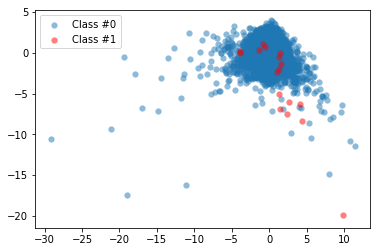

In [85]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

# Create X and y from the prep_data function 
X, y = prep_data(df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

By visualizing your data you can immediately see how our fraud cases are scattered over our data, and how few are cases we have. A picture often makes the imbalance problem often very clear. 

In [31]:
df.iloc[0].values

array([ 0.00000000e+00,  6.40000000e+01,  1.21251089e+00, -9.90542956e-02,
       -1.19209409e+00,  2.86323562e-01,  2.16051625e+00,  3.61631351e+00,
       -4.04206898e-01,  8.42330952e-01,  1.69360421e-01, -3.05221766e-02,
       -5.41957258e-01,  2.37212015e-01, -2.18129649e-01,  1.97436521e-01,
       -1.47850246e-01, -9.78301417e-02, -5.10052501e-01, -7.09392806e-02,
        3.55170584e-01,  1.47774396e-02, -1.67496337e-01, -4.94694570e-01,
       -1.49785451e-01,  1.01122655e+00,  8.83547705e-01, -3.29433811e-01,
        2.03701457e-02,  1.70370864e-02,  3.47000000e+01,  0.00000000e+00])

In [27]:
X[0]

array([-0.0990543 , -1.19209409,  0.28632356,  2.16051625,  3.61631351,
       -0.4042069 ,  0.84233095,  0.16936042, -0.03052218, -0.54195726,
        0.23721201, -0.21812965,  0.19743652, -0.14785025, -0.09783014,
       -0.5100525 , -0.07093928,  0.35517058,  0.01477744, -0.16749634,
       -0.49469457, -0.14978545,  1.01122655,  0.8835477 , -0.32943381,
        0.02037015,  0.01703709])

In [28]:
X.shape

(8000, 27)

In [29]:
y

array([0., 0., 0., ..., 0., 0., 0.])

### Resampling methods for imbalanced data

By using ROS and SMOTE you add more examples to the minority class. RUS adjusts the balance of your data by reducing the majority class.

### Applying SMOTE (Synthetic Minority Over-sampling Technique)

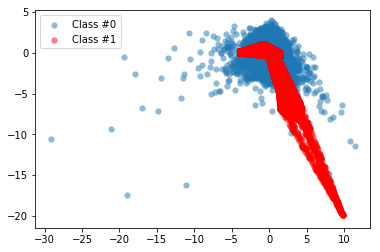

In [33]:
from imblearn.over_sampling import SMOTE

# Run the prep_data function
X, y = prep_data(df)

# Define the resampling method
method = SMOTE(kind='regular')###################################

# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

As you can see, our minority class is now much more prominently visible in our data.

### Compare SMOTE to original data

In [36]:
def compare_plot(X,y,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
    
    # some settings and ready to go
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    plt.tight_layout(pad=3)
    return plt.show()

0.0    7983
1.0      17
dtype: int64
1.0    7983
0.0    7983
dtype: int64


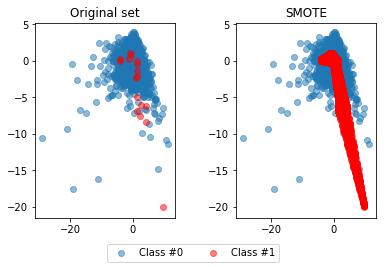

In [37]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

 It should by now be clear that our SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class. Visualizing the data shows the effect on your data very clearly

### Exploring the traditional way to catch fraud

In [38]:
# Get the mean for each group
df.groupby('Class').mean()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,4000.714894,95383.605161,0.023553,-0.008543,-0.002408,-0.034757,-0.020108,0.003264,0.023668,-0.004720,...,-0.00692,-0.004279,0.027999,0.006689,-0.000550,-0.000616,0.000659,-0.006740,0.005625,89.721167
1,3429.000000,83000.176471,-3.235382,1.317054,-3.762234,2.801140,-0.941354,-1.184692,-3.527826,-0.108892,...,-0.29245,0.361582,0.159210,-0.119366,-0.144082,0.155552,0.038765,0.265996,0.131853,65.287647


In [40]:
# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0,1
Actual Fraud,,
0,7949,34
1,13,4


not bad, with this rule, we detect 4 out of 17 fraud cases, but can't detect the other 13, and get 34 false positives.

### Using ML classification to catch fraud

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [49]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()###################################
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       1.00      0.30      0.46        10

   micro avg       1.00      1.00      1.00      2400
   macro avg       1.00      0.65      0.73      2400
weighted avg       1.00      1.00      1.00      2400

Confusion matrix:
 [[2390    0]
 [   7    3]]


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We are getting much less false positives, so that's an improvement. Also, we're catching a higher percentage of fraud cases, so that is also better than before. Do you understand why we have less observations to look at in the confusion matrix? Remember we are using only our test data to calculate the model results on. We're comparing the crosstab on the full dataset from the last exercise, with a confusion matrix of only 30% of the total dataset, so that's where that difference comes from

### Logistic regression combined with SMOTE

In [53]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2') # instead SMOTE(kind='borderline2') ###################################
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

### Using a pipeline

In [55]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2390
         1.0       0.43      0.60      0.50        10

   micro avg       0.99      0.99      0.99      2400
   macro avg       0.71      0.80      0.75      2400
weighted avg       1.00      0.99      1.00      2400

Confusion matrix:
 [[2382    8]
 [   4    6]]


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Excellent work! As you can see, the SMOTE slightly improves our results. We now manage to find all cases of fraud, but we have a slightly higher number of false positives, albeit only 8 cases. Remember, not in all cases does resampling necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly.

## Fraud detection using labelled data

### Natural hit rate

In [94]:
def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 30]
    y=np.array(y).astype(np.float)
    return X,y

In [95]:
df = pd.read_csv('chapter_2/creditcard_sampledata_2.csv')
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [96]:
X, y = prep_data(df)

In [97]:
X.shape

(7300, 28)

In [98]:
y.shape

(7300,)

In [99]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

95.8904109589041


This tells us that by doing nothing, we would be correct in 95.9% of the cases. So now you understand, that if we get an accuracy of less than this number, our model does not actually add any value in predicting how many cases are correct

In [100]:
count_non_fraud

7000

In [109]:
np.bincount(y.astype('int'))
# non_fraud 0 vs fraud 1

array([7000,  300])

### Random Forest Classifier - part 1

In [101]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)###################################

In [150]:
X_test.shape, y_test.shape

((2190, 28), (2190,))

### Random Forest Classifier - part 2

In [102]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [104]:
from sklearn.metrics import accuracy_score

In [105]:
# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

0.9908675799086758


### Performance metrics for the RF model

With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells you about the precision and recall of your model, whilst the confusion matrix actually shows how many fraud cases you can predict correctly

In [139]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the AUCROC curve, classification report and confusion matrix
print(classification_report(y_test, predicted))

print(confusion_matrix(y_test, predicted, labels=[0, 1]))

print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.99      0.79      0.88        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  19   72]]
AUC ROC score:  0.933440309095383


You have now obtained more meaningful performance metrics that tell us how well the model performs, given the highly imbalanced data that you're working with. The model predicts 73 cases of fraud, out of which 72 are actual fraud. You have only 1 false positives. This is really good, and as a result you have a very high precision score. You do however, don't catch 19 cases of actual fraud (false negative). We consider the scores based on fraud detection (1).

In [136]:
probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Plotting the Precision Recall Curve

In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa.

In [124]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

In [130]:
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_curve

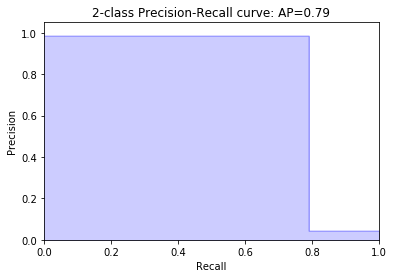

In [126]:
# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

The ROC curve plots the true positives vs. false positives , for a classifier, as its discrimination threshold is varied. Since, a random method describes a horizontal curve through the unit interval, it has an AUC of 0.5. Minimally, classifiers should perform better than this, and the extent to which they score higher than one another (meaning the area under the ROC curve is larger), they have better expected performance.

In [131]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicted)

In [132]:
false_positive_rate

array([0.00000000e+00, 4.76417342e-04, 1.00000000e+00])

In [133]:
true_positive_rate

array([0.        , 0.79120879, 1.        ])

In [134]:
threshold

array([2., 1., 0.])

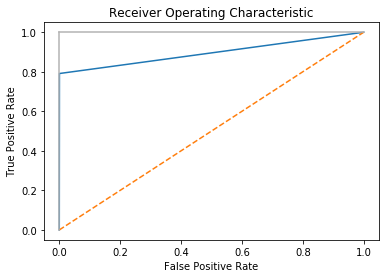

In [135]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Model adjustments

In [141]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=100, random_state=5)###################################

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9618185530524739
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.99      0.79      0.88        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  19   72]]


you can see that the model results don't improve drastically. If we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all, albeit a simple option to try. 

### Adjusting your Random Forest to fraud detection

In [158]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print (classification_report(y_test, predicted))
    print (confusion_matrix(y_test, predicted))

In [144]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, ###################################
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud 
                               criterion='entropy',
                               
                               # Change depth of model
                               max_depth=10,
                               
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               
                               # Change the number of trees to use
                               n_estimators=20, 
                               
                               n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.92      0.85      0.88        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.96      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2092    7]
 [  14   77]]


You can see by smartly defining more options in the model, you can obtain better predictions. You have effectively reduced the number of false negatives, i.e. you are catching more cases of fraud, whilst keeping the number of false positives low. In this exercise you've manually changed the options of the model

### GridSearchCV to find optimal parameters

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5) ###################################

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1) ###################################

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 30}

### Model results using GridSearchCV

In [151]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, ###################################
                               criterion='gini',
                               n_estimators=30, 
                               max_features='log2',  
                               min_samples_leaf=10, 
                               max_depth=8,
                               n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.96      0.85      0.90        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.98      0.92      0.95      2190
weighted avg       0.99      0.99      0.99      2190

[[2096    3]
 [  14   77]]


You've managed to improve your model even further. The number of false positives has now been slightly reduced even further, which means we are catching more cases of fraud. However, you see that the number of false negatives is still the same. That is that Precision-Recall trade-off in action. To decide which final model is best, you need to take into account how bad it is not to catch fraudsters, versus how many false positives the fraud analytics team can deal with. 

### Logistic Regression

In [152]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5) ###################################

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2099
         1.0       0.65      0.88      0.75        91

   micro avg       0.98      0.98      0.98      2190
   macro avg       0.82      0.93      0.87      2190
weighted avg       0.98      0.98      0.98      2190

[[2056   43]
 [  11   80]]


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As you can see the Logistic Regression has quite different performance from the Random Forest. More false positives, but also a better Recall

### Voting Classifier

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
# Import the package
from sklearn.ensemble import VotingClassifier ###################################

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2099
         1.0       0.90      0.86      0.88        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.95      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2090    9]
 [  13   78]]


 You see that by combining the classifiers, you can take the best of multiple models. You've increased the cases of fraud you are catching from 77 to 78, and you only have 6 extra false positives in return. If you do care about catching as many fraud cases as you can, whilst keeping the false positives low, this is a pretty good trade-off. The Logistic Regression as a standalone was quite bad in terms of false positives, and the Random Forest was worse in terms of false negatives. By combining these together you indeed managed to improve performance.

### Adjust weights within the Voting Classifier

In [160]:
# Define the ensemble model
ensemble_model = VotingClassifier(  ###################################
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
    voting='soft', 
    weights=[1, 4, 1], 
    flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2099
         1.0       0.92      0.86      0.89        91

   micro avg       0.99      0.99      0.99      2190
   macro avg       0.96      0.93      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2092    7]
 [  13   78]]


In [164]:
ensemble_model.estimators_

[LogisticRegression(C=1.0, class_weight={0: 1, 1: 15}, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=5,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 12},
             criterion='gini', max_depth=8, max_features='log2',
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=10,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=30, n_jobs=-1, oob_score=False, random_state=5,
             verbose=0, warm_start=False),
 DecisionTreeClassifier(class_weight='balanced', criterion='gini',
             max_depth=None, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_lea

The weight option allows you to play with the individual models to get the best final mix for your fraud detection model.